In [1]:
# Using Dean's file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline

## Loading, data exploration, cleaning

In [2]:
df_tr = pd.read_excel(r'C:\Users\us61565\Desktop\Explainability\Sample Logistic Regression_V0.xlsx', sheet_name = 'Train Data')
df_test = pd.read_excel(r'C:\Users\us61565\Desktop\Explainability\Sample Logistic Regression_V0.xlsx', sheet_name = 'Unused Sample')

In [3]:
df_test.head()

,Dep,a3,b1,b2,f1,f2,g1,m2,m3,m4,...,a4,c1,s4,t1,m1,h1,h2,a2,a1,r2
0,1,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,3.0,...,329700.0,0.0,0,6.0,338380.0,329700.0,338380.0,-0.896979,0.184865,0.122249
1,0,3.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,6.0,...,352083.0,305.0,0,9.0,338418.0,352083.0,338418.0,-0.265977,0.395128,0.261370
2,1,13.0,1.0,1.0,1.0,5.0,8.0,0.0,0.0,4.0,...,447658.0,1134.0,0,8.0,338592.0,459642.0,338592.0,-0.929949,0.176199,0.110142
3,0,15.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,6.0,...,414727.0,3740.0,1,1.0,338625.0,405127.0,338625.0,-1.474204,0.070213,0.066819
4,1,4.0,2.0,2.0,0.0,0.0,8.0,0.0,0.0,4.0,...,357456.0,115.0,1,1.0,338946.0,357437.0,338946.0,-1.663073,0.048149,0.043159


In [4]:
df_tr.isnull().sum()
# no nulls

Dep    0
a3     0
b1     0
b2     0
f1     0
f2     0
g1     0
m2     0
m3     0
m4     0
o1     0
p1     0
r1     0
r3     0
s1     0
s2     0
s3     0
a5     0
a4     0
c1     0
s4     0
t1     0
m1     0
h1     0
h2     0
a2     0
a1     0
r2     0
dtype: int64

In [5]:
df_tr.head()

,Dep,a3,b1,b2,f1,f2,g1,m2,m3,m4,...,a4,c1,s4,t1,m1,h1,h2,a2,a1,r2
0,1,12.0,2.0,11.0,1.0,0.0,2.0,0.0,0.0,7.0,...,246943.0,7030.0,1,4,0,655434,0,-2.795463,0.002591,0.003253
1,0,0.0,0.0,9.0,0.0,0.0,4.0,0.0,0.0,0.0,...,1496.0,1496.0,1,1,0,432000,0,-2.605681,0.004585,0.002096
2,1,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,67003.0,339.0,1,0,0,69551,0,-2.751968,0.002962,0.005580
3,1,7.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,...,29367.0,6664.0,1,0,0,28367,0,-1.914656,0.027768,0.017117
4,1,5.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,...,48903.0,0.0,0,0,0,64136,0,-2.523279,0.005813,0.003826


ValueError: num must be 1 <= num <= 18, not 19

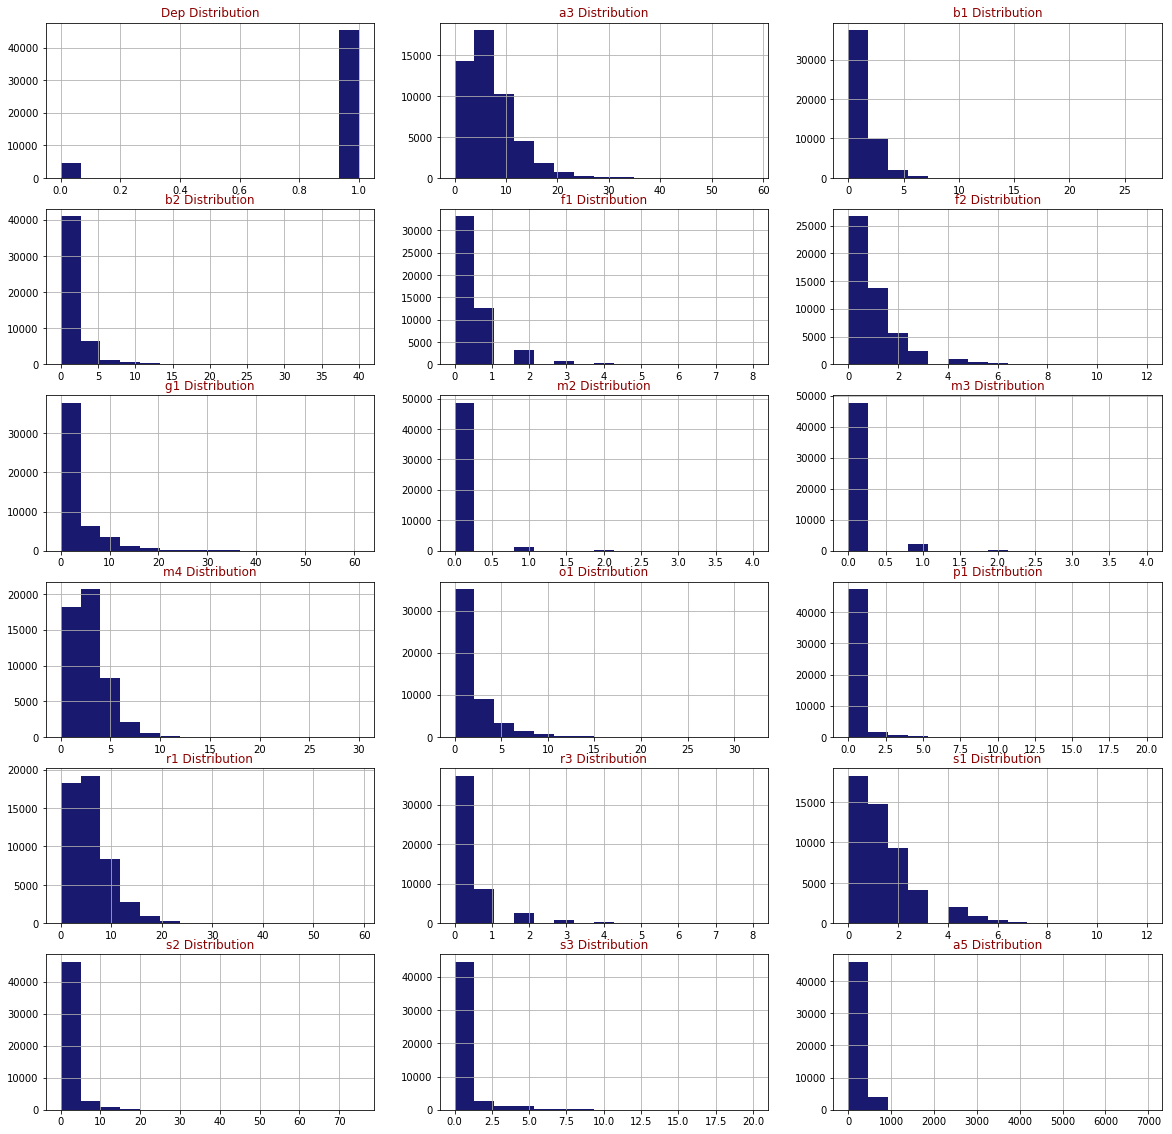

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=15,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df_tr,df_tr.columns,6,3)

# might be good to do log on everything later on features

In [ ]:
df_tr_lg = np.log(df_tr.iloc[:,1:])
df_tr_lg['Dep'] = df_tr['Dep']
df_tr_lg.head(2)
# As a result, lots of inf, b/c there are lots of zeroes in the dataframe

In [8]:
df_tr['Dep'].value_counts(normalize = True)

1    0.90958
0    0.09042
Name: Dep, dtype: float64

In [9]:
df_tr['Dep'].value_counts()

1    45479
0     4521
Name: Dep, dtype: int64

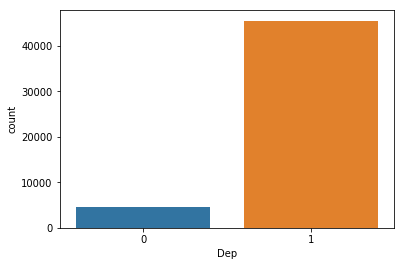

In [10]:
sns.countplot(x='Dep',data=df_tr)

### Logistic regression

In [11]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [12]:
X_train = df_tr.iloc[:,1:]
X_test = df_test.iloc[:,1:]
y_train = df_tr['Dep']
y_test = df_test['Dep']

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.24      0.07      0.11      1652
           1       0.69      0.91      0.79      3820

   micro avg       0.65      0.65      0.65      5472
   macro avg       0.47      0.49      0.45      5472
weighted avg       0.56      0.65      0.58      5472



In [16]:
print(confusion_matrix(y_test, predictions))

[[ 113 1539]
 [ 350 3470]]


In [17]:
accuracy_score(y_test, predictions)

0.6547880116959064

#### With standardizing features

In [18]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
logmodel.fit(X_train_std, y_train)
predictions_std = logmodel.predict(X_test_std)

In [21]:
print(classification_report(y_test, predictions_std))

              precision    recall  f1-score   support

           0       0.88      0.09      0.16      1652
           1       0.72      0.99      0.83      3820

   micro avg       0.72      0.72      0.72      5472
   macro avg       0.80      0.54      0.50      5472
weighted avg       0.76      0.72      0.63      5472



In [22]:
print(confusion_matrix(y_test, predictions_std))

[[ 147 1505]
 [  21 3799]]


In [23]:
print(confusion_matrix(y_test, predictions_std))

[[ 147 1505]
 [  21 3799]]


In [24]:
accuracy_score(y_test, predictions_std)

0.721125730994152

In [25]:
# balancing 1s and 0s
logmodel = LogisticRegression(class_weight = 'balanced')

In [ ]:
logmodel.fit(X_train_std, y_train)
predictions_std = logmodel.predict(X_test_std)

In [27]:
print(classification_report(y_test, predictions_std))

              precision    recall  f1-score   support

           0       0.62      0.41      0.50      1652
           1       0.78      0.89      0.83      3820

   micro avg       0.75      0.75      0.75      5472
   macro avg       0.70      0.65      0.66      5472
weighted avg       0.73      0.75      0.73      5472



In [28]:
print(confusion_matrix(y_test, predictions_std))

[[ 683  969]
 [ 417 3403]]


In [29]:
accuracy_score(y_test, predictions_std)

0.7467105263157895

In [32]:
# Under ROC curve
from sklearn.metrics import roc_auc_score
prob_y_1 = logmodel.predict_proba(X_test_std)
prob_y_1 = [p[1] for p in prob_y_1]
print(roc_auc_score(y_test, prob_y_1))

0.7136265101479405


#### Passing class weights manually

In [33]:
weights = {0 : '0.09042', 1 : '0.90958'}
logmodel_auto = LogisticRegression(class_weight = weights, solver = 'liblinear')
logmodel_auto.fit(X_train_std, y_train)
predictions_std_auto = logmodel_auto.predict(X_test_std)

In [34]:
print(classification_report(y_test, predictions_std_auto))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12      1652
           1       0.71      1.00      0.83      3820

   micro avg       0.72      0.72      0.72      5472
   macro avg       0.86      0.53      0.47      5472
weighted avg       0.80      0.72      0.62      5472



In [35]:
print(confusion_matrix(y_test, predictions_std_auto))

[[ 103 1549]
 [   0 3820]]


In [36]:
accuracy_score(y_test, predictions_std_auto)

0.716922514619883

In [37]:
# Under ROC curve
prob_y_2 = logmodel_auto.predict_proba(X_test_std)
prob_y_2 = [p[1] for p in prob_y_2]
print(roc_auc_score(y_test, prob_y_2))

0.6988906038056362


### Up-sample minority class

In [38]:
from sklearn.utils import resample

In [39]:
df_minority = df_tr[df_tr.Dep==0]
df_majority = df_tr[df_tr.Dep==1]

In [40]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=45479,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Dep.value_counts()

1    45479
0    45479
Name: Dep, dtype: int64

In [41]:
# retrain the model on the upsampled dataset
X_train_up = df_upsampled.iloc[:,1:]
y_train_up = df_upsampled['Dep']
# X_test = df_test.iloc[:,1:]
y_train_up = df_upsampled['Dep']
# y_test = df_test['Dep']

In [ ]:
X_train_up_std = scaler.fit_transform(X_train_up)
X_test__std = scaler.fit_transform(X_test)

In [ ]:
logmodel.fit(X_train_up_std, y_train_up)
predictions_up_std = logmodel.predict(X_test_std)

In [44]:
print(classification_report(y_test, predictions_up_std))

              precision    recall  f1-score   support

           0       0.44      0.66      0.53      1652
           1       0.81      0.63      0.71      3820

   micro avg       0.64      0.64      0.64      5472
   macro avg       0.62      0.65      0.62      5472
weighted avg       0.70      0.64      0.65      5472



In [45]:
print(confusion_matrix(y_test, predictions_up_std))

[[1095  557]
 [1422 2398]]


In [46]:
accuracy_score(y_test, predictions_up_std)

0.6383406432748538

### Penalize Algorithms (Cost-Sensitive Training)

In [47]:
# from sklearn.svm import SVC
# # Separate input features (X) and target variable (y)
# # y = df.balance
# # X = df.drop('balance', axis=1)
 
# # Train model
# clf_3 = SVC(kernel='linear', 
#             class_weight='balanced', # penalize
#             probability=True)
 
# clf_3.fit(X_train_std, y_train)
 
# # Predict on training set
# pred_y_3 = clf_3.predict(X_test_std)
 
# # Is our model still predicting just one class?
# print( np.unique( pred_y_3 ) )
# # [0 1]
 
# # How's our accuracy?
# print( accuracy_score(y_test, pred_y_3) )
# # 0.688
 
# # What about AUROC?
# prob_y_3 = clf_3.predict_proba(X_test_std)
# prob_y_3 = [p[1] for p in prob_y_3]
# print( roc_auc_score(y, prob_y_3) )


### Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_4 = RandomForestClassifier()
clf_4.fit(X_train_std, y_train)
pred_y_4 = clf_4.predict(X_test_std)

In [50]:
print(np.unique(pred_y_4 ))

[0 1]


In [51]:
print(classification_report(y_test, pred_y_4))

              precision    recall  f1-score   support

           0       0.64      0.10      0.18      1652
           1       0.72      0.97      0.83      3820

   micro avg       0.71      0.71      0.71      5472
   macro avg       0.68      0.54      0.50      5472
weighted avg       0.69      0.71      0.63      5472



In [52]:
print(confusion_matrix(y_test, pred_y_4))

[[ 171 1481]
 [  97 3723]]


In [53]:
accuracy_score(y_test, pred_y_4)

0.7116228070175439

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
# Under ROC curve
prob_y_4 = clf_4.predict_proba(X_test_std)
prob_y_4 = [p[1] for p in prob_y_4]
print(roc_auc_score(y_test, prob_y_4))

0.6090286405182359
